In [2]:
## Some things to think about in the future ##

# Check distribution of test and train (compare)

# plot feature versus the target variable and vs time

# https://www.coursera.org/learn/competitive-data-science/lecture/neQT5/kazanovas-competition-pipeline-part-1

# KNN on mean encoded variables

# non negative matrix factorization NMF. Good for counts like data

# https://www.coursera.org/learn/competitive-data-science/lecture/yt5t3/feature-interactions
# Use random forest to detect usefull features out of many random combinations

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html

# Use log on item count before model

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13

In [7]:
df_items = pd.read_csv('../input/items.csv')
df_item_categories = pd.read_csv('../input/item_categories.csv')
df_sales = pd.read_csv('../input/sales_train.csv')
df_sample_submission = pd.read_csv('../input/sample_submission.csv')
df_shops = pd.read_csv('../input/shops.csv')
df_test = pd.read_csv('../input/test.csv')

In [8]:
# Add pandas datime to as column
df_sales['datetimestamp'] = pd.to_datetime(df_sales['date'], 
                                           format='%d.%m.%Y', 
                                           infer_datetime_format=True)

# Group sales by month
df_sales_month = df_sales[['shop_id', 'item_id', 'date_block_num', 'item_cnt_day']]\
    .groupby(['shop_id', 'item_id', 'date_block_num'], as_index=False).sum()
df_sales_month.rename(columns={'item_cnt_day': 'item_cnt_month'}, inplace=True)

## Usefull stuff

Monthly sales are on a downtrend with peaks around December

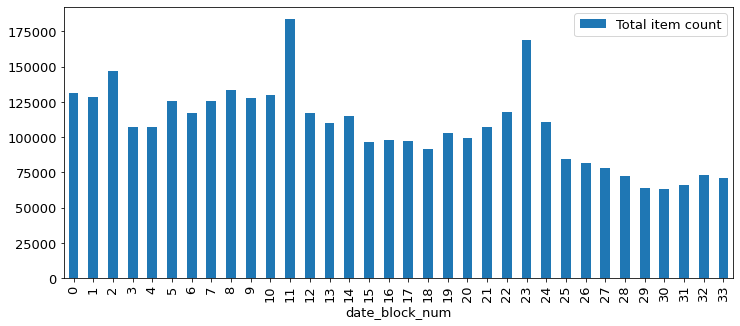

In [9]:
temp = df_sales[['date_block_num', 'item_cnt_day']].copy()
temp = temp[['date_block_num', 'item_cnt_day']].groupby('date_block_num').sum()
ax = temp.plot.bar()
ax.legend(["Total item count"]);
printmd('Monthly sales are on a downtrend with peaks around December')

Here it shows the specific shop_item occuring in X number of months. <br/>    For example in bin 1 it means that shop_item occurs only in 1 month over the whole dataset. <br/>    In bin 10 specific shop_item occurs in 10 months over the whole train dataset. <br/>    **As feature use date_year_month from the graph, logic being that with other features like MA         model could have a better idea what next value is,         as there is a decreasing trend (or something like that).**

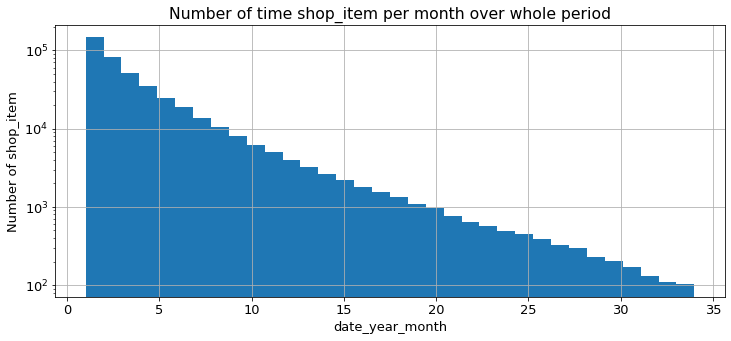

In [10]:
temp = df_sales[['shop_id', 'item_id', 'datetimestamp', 'item_cnt_day']].copy()
temp['date_year_month'] = temp['datetimestamp'].dt.to_period('M')
temp['shop_item'] = temp['shop_id'].astype(str) + '_' + temp['item_id'].astype(str)
temp = temp[['shop_item', 'date_year_month', 'item_cnt_day']]\
    .groupby(['shop_item', 'date_year_month'], as_index=False).sum()
temp.rename(columns={'item_cnt_day': 'item_cnt_sum'}, inplace=True)

temp = temp[['shop_item', 'item_cnt_sum']].groupby(['shop_item'], as_index=False).count()
temp['item_cnt_sum'].hist(log=True, bins=temp['item_cnt_sum'].max())

plt.title('Number of time shop_item per month over whole period')
plt.xlabel("date_year_month")
plt.ylabel("Number of shop_item")
printmd('Here it shows the specific shop_item occuring in X number of months. <br/>\
    For example in bin 1 it means that shop_item occurs only in 1 month over the whole dataset. <br/>\
    In bin 10 specific shop_item occurs in 10 months over the whole train dataset. <br/>\
    **As feature use date_year_month from the graph, logic being that with other features like MA \
        model could have a better idea what next value is, \
        as there is a decreasing trend (or something like that).**')
plt.show()

Here it shows the specific shop_id occuring in X number of months. <br/>    For example in bin 1 it means that shop_id occurs only in 1 month over the whole dataset. <br/>    In bin 10 specific shop_id occurs in 10 months over the whole train dataset. <br/>    **As feature use date_year_month from the graph, logic being that with other features like MA         model could have a better idea what next value is,         as there is a decreasing trend (or something like that).**

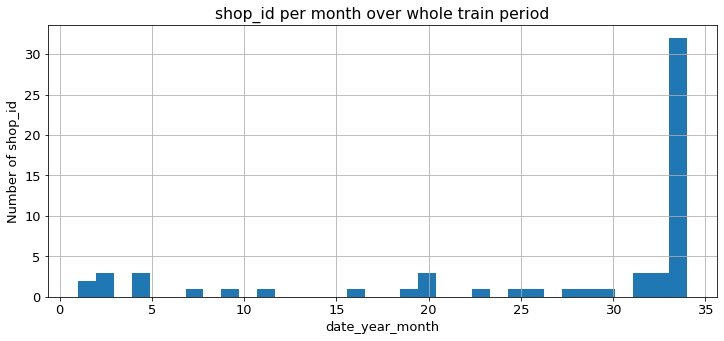

In [11]:
temp = df_sales[['shop_id', 'datetimestamp', 'item_cnt_day']].copy()
temp['date_year_month'] = temp['datetimestamp'].dt.to_period('M')
temp = temp[['shop_id', 'date_year_month', 'item_cnt_day']]\
    .groupby(['shop_id', 'date_year_month'], as_index=False).sum()

temp.rename(columns={'item_cnt_day': 'item_cnt_sum'}, inplace=True)
temp = temp[['shop_id', 'item_cnt_sum']].groupby(['shop_id'], as_index=False).count()
temp['item_cnt_sum'].hist(bins=temp['item_cnt_sum'].max())

plt.title('shop_id per month over whole train period')
plt.xlabel("date_year_month")
plt.ylabel("Number of shop_id")
printmd('Here it shows the specific shop_id occuring in X number of months. <br/>\
    For example in bin 1 it means that shop_id occurs only in 1 month over the whole dataset. <br/>\
    In bin 10 specific shop_id occurs in 10 months over the whole train dataset. <br/>\
    **As feature use date_year_month from the graph, logic being that with other features like MA \
        model could have a better idea what next value is, \
        as there is a decreasing trend (or something like that).**')
plt.show()

Here it shows the specific item_id occuring in X number of months. <br/>    For example in bin 1 it means that item_id occurs only in 1 month over the whole dataset. <br/>    In bin 10 specific item_id occurs in 10 months over the whole train dataset. <br/>    **As feature use date_year_month from the graph, logic being that with other features like MA         model could have a better idea what next value is,         as there is a decreasing trend (or something like that).**

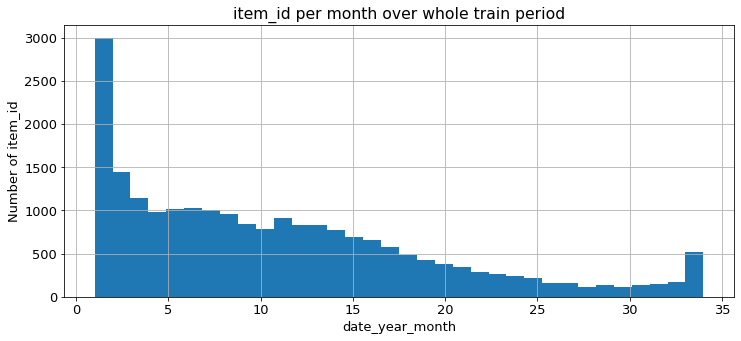

In [12]:
temp = df_sales[['item_id', 'datetimestamp', 'item_cnt_day']].copy()
temp['date_year_month'] = temp['datetimestamp'].dt.to_period('M')
temp = temp[['item_id', 'date_year_month', 'item_cnt_day']]\
    .groupby(['item_id', 'date_year_month'], as_index=False).sum()

temp.rename(columns={'item_cnt_day': 'item_cnt_sum'}, inplace=True)
temp = temp[['item_id', 'item_cnt_sum']].groupby(['item_id'], as_index=False).count()
temp['item_cnt_sum'].hist(bins=temp['item_cnt_sum'].max())

plt.title('item_id per month over whole train period')
plt.xlabel("date_year_month")
plt.ylabel("Number of item_id")
printmd('Here it shows the specific item_id occuring in X number of months. <br/>\
    For example in bin 1 it means that item_id occurs only in 1 month over the whole dataset. <br/>\
    In bin 10 specific item_id occurs in 10 months over the whole train dataset. <br/>\
    **As feature use date_year_month from the graph, logic being that with other features like MA \
        model could have a better idea what next value is, \
        as there is a decreasing trend (or something like that).**')
plt.show()

Number of unique shop_item per date_block_num

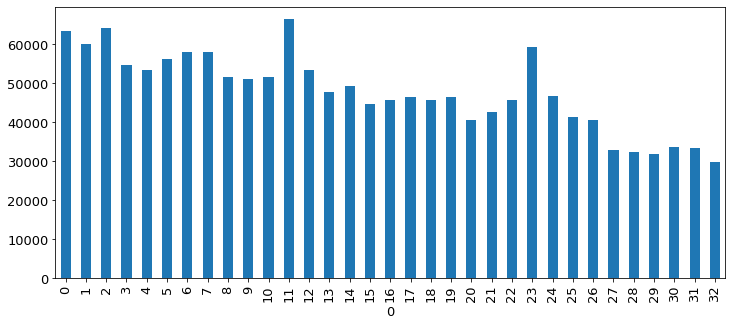

In [18]:
temp = df_sales_month.copy()
temp['shop_item'] = temp['shop_id'].astype(str) + '_' + temp['item_id'].astype(str)

res = []
for x in range(temp['date_block_num'].max()):
    r = temp[temp['date_block_num'] == x]['shop_item'].unique().size
    res.append([x,r])
    
temp_res = pd.DataFrame(res)
temp_res.plot.bar(x=0, y=1, legend=False)
printmd('Number of unique shop_item per date_block_num')

Some shops have been selling way more than other shops. </br>        Next plot explores variance per shop per month

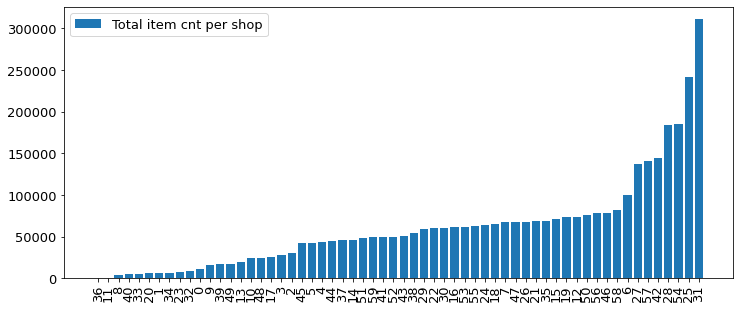

Some shops have reasonably high variance per shop per month </br>    Variance without December in grey.

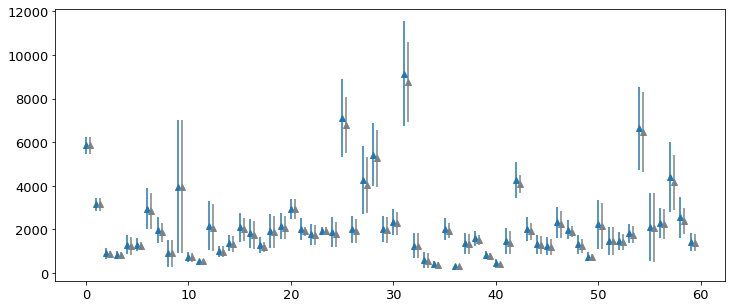

In [14]:
# Total items sold by shop
temp = df_sales[['shop_id', 'item_id', 'datetimestamp', 'item_cnt_day']].copy()

temp = temp[['shop_id', 'item_cnt_day']].groupby('shop_id').sum()
temp.sort_values('item_cnt_day', inplace=True)
temp.reset_index(inplace=True)
plt.bar(temp['shop_id'].astype(str).values, temp['item_cnt_day'].values)
plt.xticks(rotation=90)
plt.legend(["Total item cnt per shop"]);
printmd('Some shops have been selling way more than other shops. </br>\
        Next plot explores variance per shop per month')
plt.show()

# Shop std, mean per month
temp = df_sales[['shop_id', 'item_id', 'datetimestamp', 'item_cnt_day']].copy()
temp['date_year_month'] = temp['datetimestamp'].dt.to_period('M')

temp = temp[['shop_id', 'date_year_month', 'item_cnt_day']]\
    .groupby(['shop_id', 'date_year_month'], as_index=False).sum()

temp_2 = temp[['shop_id', 'item_cnt_day']].groupby(['shop_id'], as_index=False)\
    .agg({'item_cnt_day':['mean', 'std']})
temp_2.columns = [x[0] if not x[1] else x[0]+'-'+x[1] for x in temp_2.columns]
temp_2.sort_values('item_cnt_day-mean', inplace=True)
plt.errorbar(temp_2['shop_id'], \
             temp_2['item_cnt_day-mean'], \
             temp_2['item_cnt_day-std'], \
             linestyle='None', marker='^')
printmd('Some shops have reasonably high variance per shop per month </br>\
    Variance without December in grey.')

temp_2 = temp[temp['date_year_month'].dt.month != 12]
temp_2 = temp_2[['shop_id', 'item_cnt_day']].groupby(['shop_id'], as_index=False)\
    .agg({'item_cnt_day':['mean', 'std']})
temp_2.columns = [x[0] if not x[1] else x[0]+'-'+x[1] for x in temp_2.columns]
temp_2.sort_values('item_cnt_day-mean', inplace=True)
plt.errorbar(temp_2['shop_id']+0.4, \
             temp_2['item_cnt_day-mean'], \
             temp_2['item_cnt_day-std'], \
             linestyle='None', marker='^', ecolor='grey', color='grey')
plt.show()

In [15]:
# Test unique shop_item
temp = df_test.copy()
temp['shop_item'] = temp['shop_id'].astype(str) + '_' + temp['item_id'].astype(str)
print('nr of test shop_item unique', temp['shop_item'].unique().shape[0])
test_unique_shop_item = temp['shop_item'].unique()

# Train unique shop_item
temp = df_sales[['shop_id', 'item_id', 'datetimestamp']].copy()
temp['date_year_month'] = df_sales['datetimestamp'].dt.to_period('M')
temp['shop_item'] = temp['shop_id'].astype(str) + '_' + temp['item_id'].astype(str)
print('nr of train shop_item unique', temp['shop_item'].unique().shape[0])
train_unique_shop_item = temp['shop_item'].unique()

temp = df_sales[['shop_id', 'item_id', 'datetimestamp']].copy()
temp['date_year_month'] = temp['datetimestamp'].dt.to_period('M')
temp['shop_item'] = temp['shop_id'].astype(str) + '_' + temp['item_id'].astype(str)
temp_2 = temp[temp['shop_item'].isin(test_unique_shop_item)]
print('all train sales', temp.shape[0])
print('train sales with only test shop_items', 
      temp_2.shape[0])

printmd('It shows that test has shop_item which do not exists in train. </br>\
        Through leaderboard probing we know that the shop_item unique in test cannot be 0. </br>\
        Probing was done simply, take the shop_item which are unique to test, set half 0 </br>\
        and other half 1, then switch. If leaderboard score changes then shop_item unique \
        to test cannot be 0, leaderboard score changed. </br>\
        I also learned that at least some of the shop_item are 0 in test set')

nr of test shop_item unique 214200
nr of train shop_item unique 424124
all train sales 2935849
train sales with only test shop_items 1224439


It shows that test has shop_item which do not exists in train. </br>        Through leaderboard probing we know that the shop_item unique in test cannot be 0. </br>        Probing was done simply, take the shop_item which are unique to test, set half 0 </br>        and other half 1, then switch. If leaderboard score changes then shop_item unique         to test cannot be 0, leaderboard score changed. </br>        I also learned that at least some of the shop_item are 0 in test set

This shows unique items per shop. </br>    Distribution between test and train is very different. </br>    ***Test has too accurate counts.***

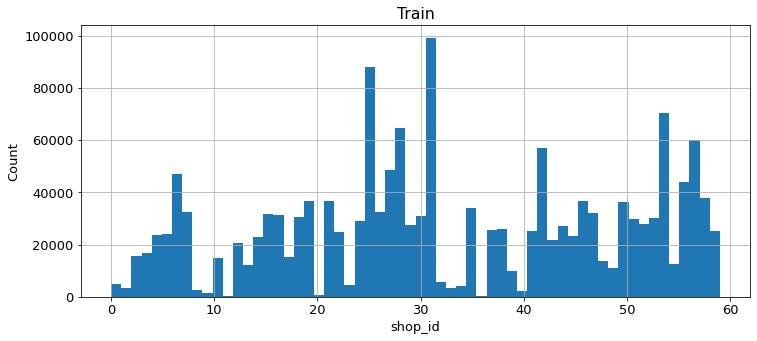

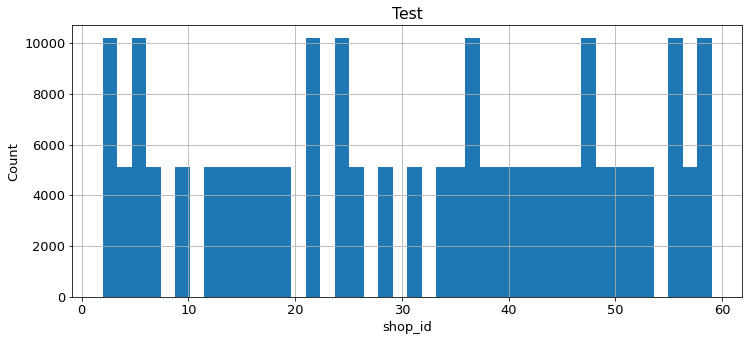

Each shop in test has exactly 42 items

mean    42.0
std      0.0
Name: item_id, dtype: float64


Number of item_ids unique to test: 363

In [19]:
printmd('This shows unique items per shop. </br>\
    Distribution between test and train is very different. </br>\
    ***Test has too accurate counts.***')
df_sales_month['shop_id'].hist(bins=df_sales_month['shop_id'].unique().size)
plt.title('Train')
plt.xlabel("shop_id")
plt.ylabel("Count")
plt.show()
df_test['shop_id'].hist(bins=df_test['shop_id'].unique().size)
plt.title('Test')
plt.xlabel("shop_id")
plt.ylabel("Count")
plt.show()
printmd('Each shop in test has exactly 42 items')
print(df_test['item_id'].value_counts().agg(['mean','std']))

item_ids_missing_in_train = set(df_test['item_id'].unique()) - set(df_sales['item_id'].unique())
item_ids_missing_in_train = list(item_ids_missing_in_train)
printmd("Number of item_ids unique to test: " + str(len(item_ids_missing_in_train)))

It is clear that majority of sales are by few item categories

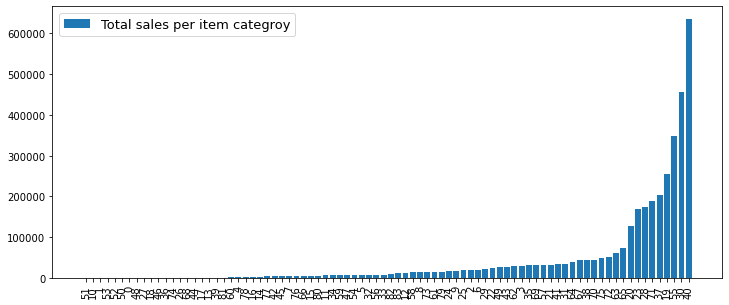

In [17]:
temp = df_sales_month.copy()
temp = temp.merge(df_items, how='left', left_on='item_id', right_on='item_id')
temp = temp[['item_category_id', 'item_cnt_month']]\
    .groupby(['item_category_id'], as_index=False).sum()
temp.sort_values('item_cnt_month', inplace=True)
temp.reset_index(inplace=True, drop=True)

plt.bar(temp['item_category_id'].astype(str).values, temp['item_cnt_month'].values)
plt.tick_params(labelsize=10)
plt.xticks(rotation=90)
plt.legend(["Total sales per item categroy"]);
printmd('It is clear that majority of sales are by few item categories')

It is clear that mmore sales are done on Saturday/Sunday

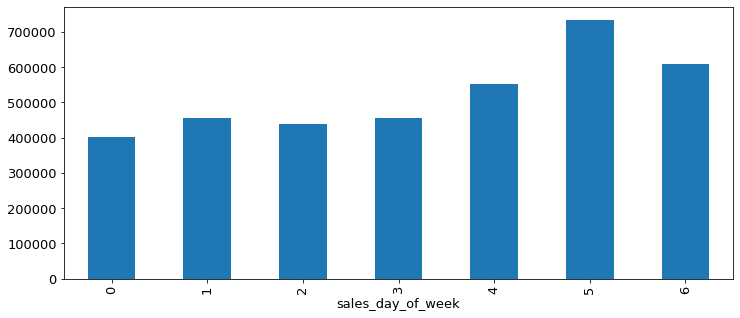

The end of this chart is interesting. Like something changed during last months of the train data

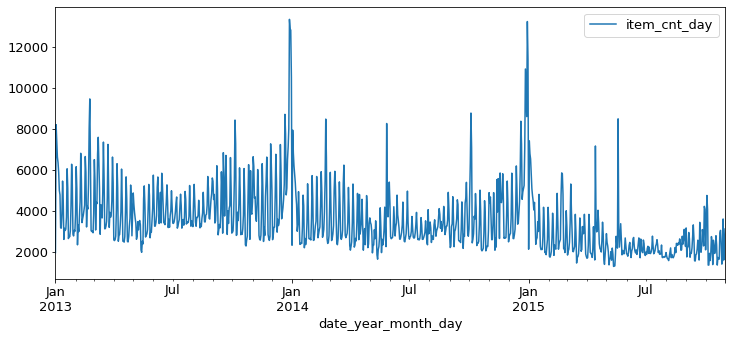

On average November seems to have less sales than other months

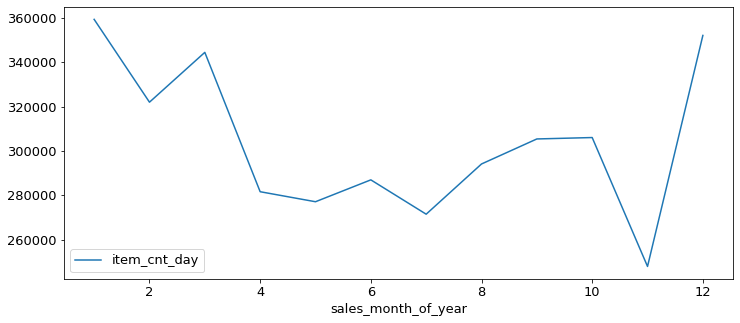

There seem to be few holidays during the year when sales peak

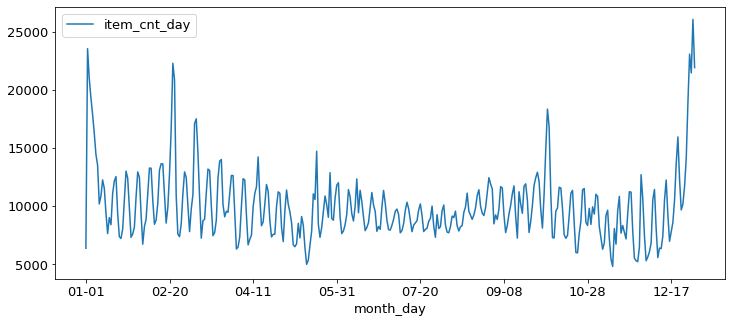

In [26]:
temp_sales = df_sales.copy()
temp_sales['datetimestamp'] = pd.to_datetime(temp_sales['date'], 
                                           format='%d.%m.%Y', 
                                           infer_datetime_format=True)
temp_sales['date_year_month_day'] = temp_sales['datetimestamp'].dt.to_period('D')
temp_sales['sales_day_of_week'] = temp_sales['date_year_month_day'].dt.weekday
temp_sales['sales_day_of_month'] = temp_sales['date_year_month_day'].dt.day
temp_sales['sales_day_of_year'] = temp_sales['date_year_month_day'].dt.day_of_year
temp_sales['sales_month_of_year'] = temp_sales['date_year_month_day'].dt.month
temp_sales['month_day'] = \
    temp_sales['sales_month_of_year'].apply(lambda x: '0'+str(x) if x<10 else str(x)) \
    + '-' + \
    temp_sales['sales_day_of_month'].apply(lambda x: '0'+str(x) if x<10 else str(x))

t = temp_sales[['sales_day_of_week', 'item_cnt_day']].groupby('sales_day_of_week').sum()
t['item_cnt_day'].plot.bar()
printmd('It is clear that mmore sales are done on Saturday/Sunday')
plt.show()

# t = temp_sales[['sales_day_of_month', 'item_cnt_day']].groupby('sales_day_of_month').sum()
# t['item_cnt_day'].plot.bar()
# plt.show()

# t = temp_sales[['sales_day_of_year', 'item_cnt_day']].groupby('sales_day_of_year').sum()
# t.plot.line()
# printmd('There seem to be few holidays during the year when sales peak')
# plt.show()

t = temp_sales[['date_year_month_day', 'item_cnt_day']].groupby('date_year_month_day').sum()
t.plot.line()
printmd('The end of this chart is interesting. Like something changed during last months of the train data')
plt.show()

t = temp_sales[['sales_month_of_year', 'item_cnt_day']].groupby('sales_month_of_year').sum()
t.plot.line()
printmd('On average November seems to have less sales than other months')
plt.show()

t = temp_sales[['month_day', 'item_cnt_day']].groupby('month_day').sum()
t.plot.line()
printmd('There seem to be few holidays during the year when sales peak')
plt.show()